In [1]:
#Basic libraries
import pandas as pd
import numpy as np
#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries

from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
import pandas as pd
data=pd.read_csv("/content/Musical_instruments_reviews.csv")
data.tail(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10251,A3M1PLEYNDEYO8,B00JBIVXGC,"G. Thomas ""Tom""","[0, 0]",True to phosphor bronze these strings have a m...,5.0,"they sound great, feel great",1404172800,"07 1, 2014"
10252,A1SD1C8XK3Z3V1,B00JBIVXGC,"guitfiddleblue ""guitfiddleblue""","[0, 0]",I've used Elixirs for about five years now. Th...,5.0,Elixirs just sound good,1404086400,"06 30, 2014"
10253,A2VRAT69JDAD3W,B00JBIVXGC,"Jason Whitt ""Whittmeister""","[0, 0]","I'm a D'Addario man myself, but hey free is fr...",4.0,"I'm a D'Addario man myself, but hey free is ...",1405900800,"07 21, 2014"
10254,A306NASGVUDFKF,B00JBIVXGC,"Jeffrey E ""jeffinaustintx""","[0, 0]",I really like these strings. While they are n...,5.0,I really like these strings,1404432000,"07 4, 2014"
10255,A1TSKKBNV38E8Y,B00JBIVXGC,"K. Harriger ""K.R. Harriger""","[0, 0]",I have lots of friends who play these strings....,3.0,"Hmmm.... I like them, but with a lot of reserv...",1403654400,"06 25, 2014"
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",4.0,"These strings are really quite good, but I wou...",1405468800,"07 16, 2014"


In [3]:
data.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [4]:
print(data.duplicated())


0        False
1        False
2        False
3        False
4        False
         ...  
10256    False
10257    False
10258    False
10259    False
10260    False
Length: 10261, dtype: bool


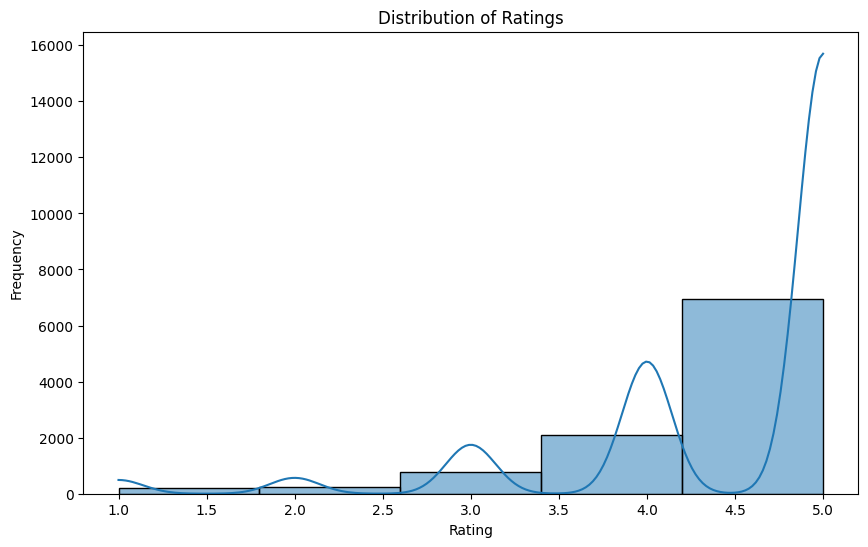

In [5]:
# prompt: code to plot the histrogram on the basise of rating

plt.figure(figsize=(10, 6))
sns.histplot(data['overall'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [6]:
# prompt: code to fill the null values in the reviewerName  with empty strimg

data['reviewerName'].fillna('', inplace=True)


In [7]:
# prompt: code to fill the null values in the reviewerName  with empty strimg

data['reviewText'].fillna('', inplace=True)


In [8]:
data.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,0
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [9]:
# shape i use to find the no.of coloums and rows in the data
data.shape

(10261, 9)

In [10]:
# it is used to count the number of overall rating count
data["overall"].value_counts()

,count
overall,
5.0,6938
4.0,2084
3.0,772
2.0,250
1.0,217


In [11]:
def f(row):

    '''This function returns sentiment value based on the overall ratings from the user'''

    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val # Returns a single value for each row

data['Sentiment'] =data.apply(f, axis=1)
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",Positive


In [12]:
# Checking the count of values
data['Sentiment'].value_counts() # Changed 'sentiment' to 'Sentiment'

,count
Sentiment,
Positive,9022
Neutral,772
Negative,467


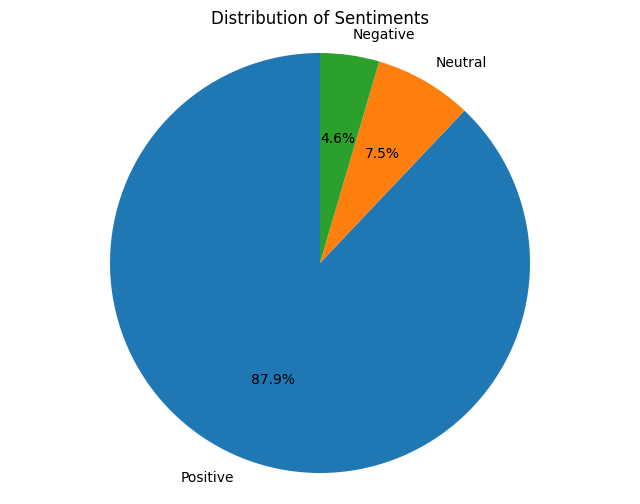

In [13]:
# prompt: code to represent the above data in PIC CHArt

import matplotlib.pyplot as plt

sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [14]:
# Calculate the number of samples to keep for each rating
min_samples = data['Sentiment'].value_counts().min() # Changed 'data' to 'balanced_data'

# Create a new DataFrame for the balanced data
balanced_df = pd.DataFrame()  # Use a different variable name to avoid overwriting

for rating in data['Sentiment'].unique():
    rating_data = data[data['Sentiment'] == rating].sample(n=min_samples, random_state=42)
    balanced_df = pd.concat([balanced_df, rating_data])  # Append to the new DataFrame

# Reset the index of the balanced dataset and assign it to balanced_data
balanced_data = balanced_df.reset_index(drop=True)

# Print the value counts of the balanced dataset
print(balanced_data['Sentiment'].value_counts())

Sentiment
Positive    467
Neutral     467
Negative    467
Name: count, dtype: int64


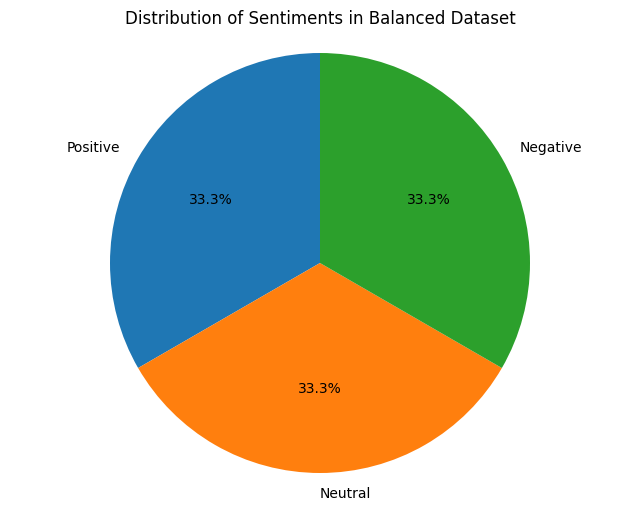

In [15]:
# prompt: code to represent the above data in PIC CHArt

import matplotlib.pyplot as plt

# Assuming 'balanced_data' is your DataFrame with the balanced dataset
sentiment_counts = balanced_data['Sentiment'].value_counts()

# Create a pie chart to visualize the distribution of sentiments
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments in Balanced Dataset')
plt.axis('equal')  # Ensure the pie chart is drawn as a circle.
plt.show()





 Preprocessing


In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # import the stopwords corpus
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


streaming


streaming is the process of converting the words into root_words example actor,actoress,etc.... as act

In [17]:
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords

def stemming(content):
    port_stem = PorterStemmer() # create an instance of the PorterStemmer class
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [18]:
data['stemmed_content'] = data['reviewText'].apply(stemming)

In [19]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Sentiment,stemmed_content
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",Positive,much write exactli suppos filter pop sound rec...
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Positive,product exactli quit afford realiz doubl scree...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",Positive,primari job devic block breath would otherwis ...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Positive,nice windscreen protect mxl mic prevent pop th...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",Positive,pop filter great look perform like studio filt...


Polarity, Review Length, and Word Counts


In [20]:
data["polarity"] = data["stemmed_content"].map(lambda Text: TextBlob(Text).sentiment.polarity)

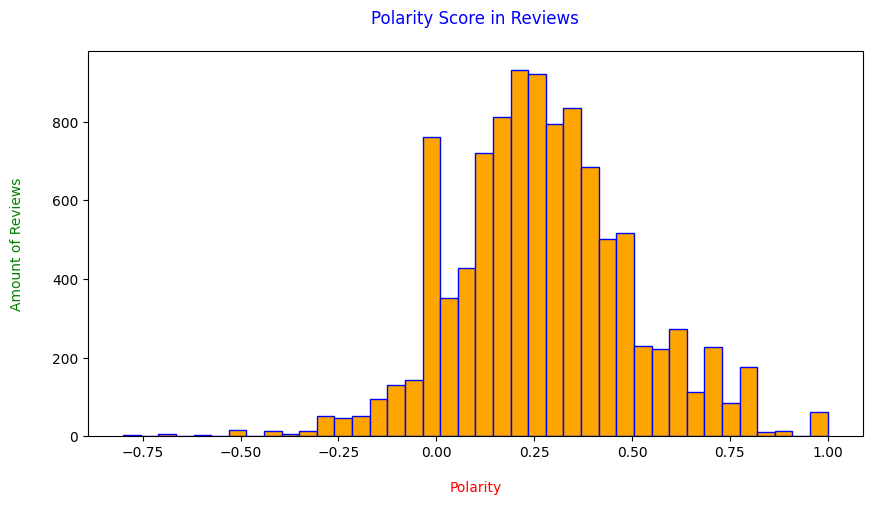

In [21]:
data["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [22]:
data["length"] = data["stemmed_content"].astype(str).apply(len)

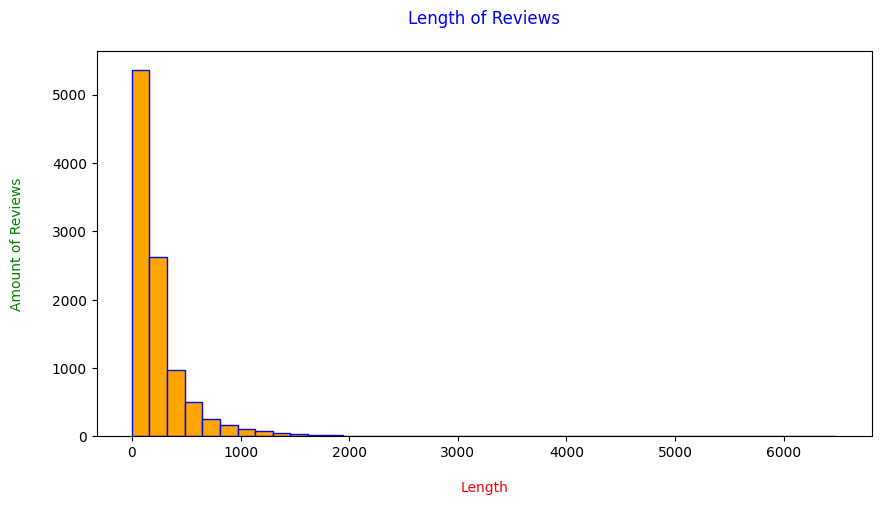

In [23]:

data["length"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Length of Reviews", color = "blue", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [24]:
data["word_counts"] = data["stemmed_content"].apply(lambda x: len(str(x).split()))

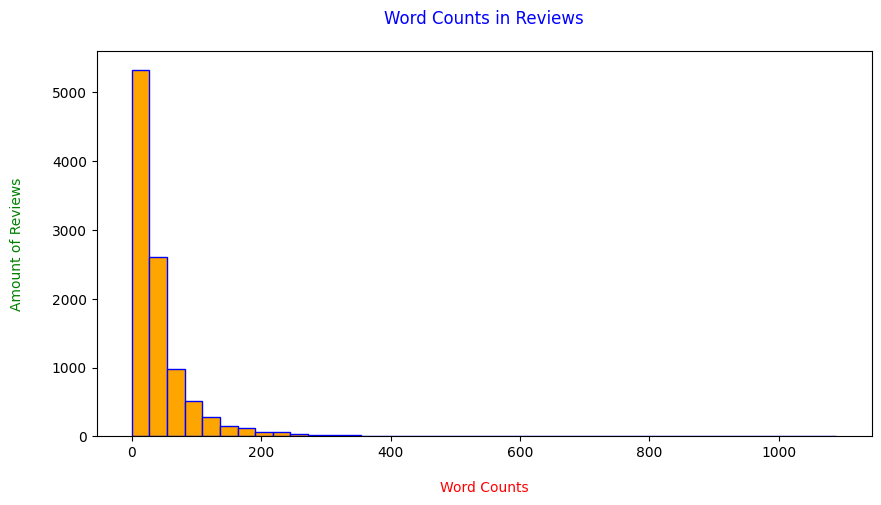

In [25]:
data["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

N-Gram Analysis for text breaking


In [26]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

In [27]:
# Use dropna() so the base DataFrame is not affected
Positive = data[data["Sentiment"] == "Positive"].dropna()
Neutral = data[data["Sentiment"] == "Neutral"].dropna()
Negative = data[data["Sentiment"] == "Negative"].dropna()

In [28]:
print(data['stemmed_content'])

0        much write exactli suppos filter pop sound rec...
1        product exactli quit afford realiz doubl scree...
2        primari job devic block breath would otherwis ...
3        nice windscreen protect mxl mic prevent pop th...
4        pop filter great look perform like studio filt...
                               ...                        
10256                                   great expect thank
10257    think tri nanoweb string bit put high price co...
10258    tri coat string past includ elixir never fond ...
10259    well made elixir develop taylor guitar string ...
10260    string realli quit good call perfect unwound s...
Name: stemmed_content, Length: 10261, dtype: object


In [29]:
print(data['Sentiment'])

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
10256    Positive
10257    Positive
10258    Positive
10259    Positive
10260    Positive
Name: Sentiment, Length: 10261, dtype: object


In [30]:
# separating the label and data
x=data['stemmed_content'].values
y=data['Sentiment'].values

In [31]:
print(x)

['much write exactli suppos filter pop sound record much crisp one lowest price pop filter amazon might well buy honestli work despit price'
 'product exactli quit afford realiz doubl screen arriv even better expect ad bonu one screen carri small hint smell old grape candi use buy reminisc sake cannot stop put pop filter next nose smell record dif need pop filter work well expens one may even come pleas aroma like mine buy product'
 'primari job devic block breath would otherwis produc pop sound allow voic pass notic reduct volum high frequenc doubl cloth filter block pop let voic color metal clamp mount attach mike stand secur enough keep attach goos neck need littl coax stay put'
 ...
 'tri coat string past includ elixir never fond whenev tri felt certain disconnect guitar somewhat reminisc wear condom hate realli love best one tri far still like much regular string type gig mostli seem reason trade need longer last string whatev reason realli best dozen gig still sound put'
 'well m

In [32]:
print(y)


['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [33]:
# spliting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [34]:
print(x.shape,x_train.shape,x_test.shape)

(10261,) (8208,) (2053,)


In [35]:
print(x_train)

['rate item problem fix mayb normal vox ac hw x put jj ax v signific volum gain reduct know tube put stock rubi back v volum gain back check yet say loss volum think mayb higher headroom tube stamp one confus typic jj headroom dig tube far back goe rubi'
 'fender amp perfect size practic take along sound great like headphon mp player hookup good valu'
 'ok qualiti certainli better piec rope found bit uncomfort sure money worthwhil'
 ...
 'total awesom string heard string great highli recommend everyon tri outstand string life superior sound eas slide get string everi time elixir life pay doubl string day'
 'first time use item broke round back screw onto mic stand broke realli excit us transfer music sheet ipad soon took mic stand round piec came would rather contact seller post good review kept refer deliveri like product hold ipad steadi even leather case sad'
 'sound qualiti bx sound neutral balanc compar similar size consum speaker bit underst without bass bloat exagger high e teen

In [36]:
print(y_test)

['Neutral' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [37]:
# coverting the textual data to numerical data because the machine can understan nly 0 and 1
vectorizer=TfidfVectorizer()

x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [38]:
print(x_train)

  (0, 7823)	0.11064064141688429
  (0, 5113)	0.09966907794310716
  (0, 7555)	0.07771658825435074
  (0, 3614)	0.11675191966923328
  (0, 5925)	0.19991022624663357
  (0, 6567)	0.10912711399114614
  (0, 10911)	0.12437474937949236
  (0, 34)	0.11675191966923328
  (0, 4739)	0.19420885083605555
  (0, 7703)	0.14919336646987852
  (0, 5205)	0.30575626344265683
  (0, 674)	0.1471622551258372
  (0, 8778)	0.14333029521374488
  (0, 10904)	0.2674066506875814
  (0, 3930)	0.19821606641228362
  (0, 7957)	0.1679790592605064
  (0, 5373)	0.07997358645831724
  (0, 10344)	0.2852235419924858
  (0, 9384)	0.1119320436131552
  (0, 8319)	0.3661599735993688
  (0, 690)	0.22570577665724129
  (0, 1646)	0.105498918355265
  (0, 11380)	0.09344903923636899
  (0, 8433)	0.07229530295266831
  (0, 5699)	0.135700773433621
  :	:
  (8207, 2797)	0.043066790022688775
  (8207, 9890)	0.08613358004537755
  (8207, 6722)	0.043066790022688775
  (8207, 1037)	0.04502565785449899
  (8207, 5293)	0.04502565785449899
  (8207, 6410)	0.0450256578

In [39]:
model=LogisticRegression(max_iter=1000)


In [40]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [41]:
# Import the necessary module and function
from sklearn.metrics import accuracy_score

# acccuracy score on the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print("Accuracy score on the training data:",training_data_accuracy)
# Import the necessary module and function
from sklearn.metrics import accuracy_score

# acccuracy score on the testing data
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy score on the testing data:",testing_data_accuracy)

Accuracy score on the training data: 0.8916910331384016
Accuracy score on the testing data: 0.8787140769605456


In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Training the SVC model
model_svc = SVC()
model_svc.fit(x_train, y_train)

# Model evaluation on the training data
x_train_prediction_svc = model_svc.predict(x_train)
training_data_accuracy_svc = accuracy_score(y_train, x_train_prediction_svc)
print("Accuracy score on the training data:", training_data_accuracy_svc)

# Model evaluation on the testing data
x_test_prediction_svc = model_svc.predict(x_test)
testing_data_accuracy_svc = accuracy_score(y_test, x_test_prediction_svc)
print("Accuracy score on the testing data:", testing_data_accuracy_svc)


Accuracy score on the training data: 0.9120370370370371
Accuracy score on the testing data: 0.8787140769605456


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Training the KNN model
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

# Accuracy on the training data
x_train_prediction_knn = model_knn.predict(x_train)
training_data_accuracy_knn = accuracy_score(y_train, x_train_prediction_knn)
print("Accuracy score on the training data:", training_data_accuracy_knn)

# Accuracy on the testing data
x_test_prediction_knn = model_knn.predict(x_test)
testing_data_accuracy_knn = accuracy_score(y_test, x_test_prediction_knn)
print("Accuracy score on the testing data:", testing_data_accuracy_knn)


Accuracy score on the training data: 0.8796296296296297
Accuracy score on the testing data: 0.8787140769605456


In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Train the Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(x_train, y_train)

# Make predictions on the training data
x_train_prediction_nb = model_nb.predict(x_train)
training_data_accuracy_nb = accuracy_score(y_train, x_train_prediction_nb)
print("Accuracy score on the training data:", training_data_accuracy_nb)

# Make predictions on the testing data
x_test_prediction_nb = model_nb.predict(x_test)
testing_data_accuracy_nb = accuracy_score(y_test, x_test_prediction_nb)
print("Accuracy score on the testing data:", testing_data_accuracy_nb)




Accuracy score on the training data: 0.8790204678362573
Accuracy score on the testing data: 0.8792011690209449


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Training the Decision Tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

# Model evaluation on the training data
x_train_prediction_dt = model_dt.predict(x_train)
training_data_accuracy_dt = accuracy_score(y_train, x_train_prediction_dt)
print("Accuracy score on the training data:", training_data_accuracy_dt)

# Model evaluation on the testing data
x_test_prediction_dt = model_dt.predict(x_test)
testing_data_accuracy_dt = accuracy_score(y_test, x_test_prediction_dt)
print("Accuracy score on the testing data:", testing_data_accuracy_dt)




Accuracy score on the training data: 1.0
Accuracy score on the testing data: 0.8119824646858256


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Training the Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

# Accuracy score on the training data
x_train_prediction_rf = model_rf.predict(x_train)
training_data_accuracy_rf = accuracy_score(y_train, x_train_prediction_rf)
print("Accuracy score on the training data:", training_data_accuracy_rf)

# Accuracy score on the testing data
x_test_prediction_rf = model_rf.predict(x_test)
testing_data_accuracy_rf = accuracy_score(y_test, x_test_prediction_rf)
print("Accuracy score on the testing data:", testing_data_accuracy_rf)




Accuracy score on the training data: 1.0
Accuracy score on the testing data: 0.8792011690209449


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Create a KNN classifier with a specific number of neighbors (e.g., 5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn_classifier.fit(x_train, y_train)

# Make predictions on the training data
x_train_prediction_knn = knn_classifier.predict(x_train)
training_data_accuracy_knn = accuracy_score(y_train, x_train_prediction_knn)
print("Accuracy score on the training data:", training_data_accuracy_knn)

# Make predictions on the testing data
x_test_prediction_knn = knn_classifier.predict(x_test)
testing_data_accuracy_knn = accuracy_score(y_test, x_test_prediction_knn)
print("Accuracy score on the testing data:", testing_data_accuracy_knn)




Accuracy score on the training data: 0.8796296296296297
Accuracy score on the testing data: 0.8787140769605456


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Train the Gradient Boosting Machine model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(x_train, y_train)

# Accuracy score on the training data
x_train_prediction_gbm = gbm_model.predict(x_train)
training_data_accuracy_gbm = accuracy_score(y_train, x_train_prediction_gbm)
print("GBM Accuracy score on the training data:", training_data_accuracy_gbm)

# Accuracy score on the testing data
x_test_prediction_gbm = gbm_model.predict(x_test)
testing_data_accuracy_gbm = accuracy_score(y_test, x_test_prediction_gbm)
print("GBM Accuracy score on the testing data:", testing_data_accuracy_gbm)



GBM Accuracy score on the training data: 0.8966861598440545
GBM Accuracy score on the testing data: 0.8821237213833415


In [49]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the training labels and transform them
y_train_encoded = le.fit_transform(y_train)

# Transform the testing labels using the same encoder
y_test_encoded = le.transform(y_test)

# Create a LightGBM dataset
train_data = lgb.Dataset(x_train, label=y_train_encoded) # Use encoded labels
test_data = lgb.Dataset(x_test, label=y_test_encoded) # Use encoded labels

# Define the parameters for LightGBM
params = {
    'objective': 'multiclass',  # For multi-class classification
    'num_class': len(np.unique(y_train_encoded)),  # Number of classes
    'metric': 'multi_logloss',  # Evaluation metric
    'boosting_type': 'gbdt',  # Gradient boosting decision tree
    'learning_rate': 0.1,  # Learning rate
    'num_leaves': 31,  # Number of leaves in a tree
    'max_depth': -1,  # Maximum depth of a tree (-1 means no limit)
    'verbose': -1  # Suppress output
}

# Train the LightGBM model
model_lgb = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Make predictions on the test data
y_pred_lgb = model_lgb.predict(x_test)
y_pred_lgb = [np.argmax(line) for line in y_pred_lgb]

# Calculate the accuracy
accuracy_lgb = accuracy_score(y_test_encoded, y_pred_lgb) # Use encoded labels
print("LightGBM Accuracy:", accuracy_lgb)

LightGBM Accuracy: 0.8816366293229421


In [50]:
# prompt: code forNaive Bayes Test

# Import the necessary library
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already have x_train and y_train
# Initialize the Naive Bayes model
model_nb = MultinomialNB()
# Fit the model to the training data
model_nb.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_nb = model_nb.predict(x_test)

# Evaluate the model

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)



Naive Bayes Accuracy: 0.8792011690209449


Cross-Validation for Model Evaluation


Logistic Regression with Hyperparameter Tuning


Hyperparameter Tuning


*Hyperparameters


*Fitting the Best Model


In [51]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Sample dataset (replace with your actual data)
# X, y = load_your_data()  # Ensure X and y are defined with your dataset

# Create model objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv = DecisionTreeClassifier(random_state=0)
knn_cv = KNeighborsClassifier()
svc_cv = SVC()
gbm_model = GradientBoostingClassifier(random_state=0)
lgbm_cv = LGBMClassifier(random_state=0)
nb_cv = BernoulliNB()

# Dictionary to label models
cv_dict = {
    0: 'Logistic Regression',
    1: 'Decision Tree',
    2: 'KNN',
    3: 'SVC',
    4: 'Naive Bayes',
    5: 'LGBM',
    6: 'Gradient Boosting'
}

# List of models for iteration
cv_models = [logreg_cv, dt_cv, knn_cv, svc_cv, nb_cv, lgbm_cv, gbm_model]

# Evaluate each model using cross-validation
for i, model in enumerate(cv_models):
    # Calculate the mean cross-validated accuracy
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    print("{} Test Accuracy: {:.4f}".format(cv_dict[i], accuracy))


NameError: name 'X' is not defined

In [52]:
from sklearn.metrics import classification_report

# Fit the SVC model
svc_cv.fit(X, y)

# Make predictions
y_pred = svc_cv.predict(X)

# Generate confusion matrix
cm = confusion_matrix(y, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')

# Generate classification report
report = classification_report(y, y_pred)
print("Classification Report:\n", report)


NameError: name 'X' is not defined

In [53]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Sample dataset (replace with your actual data)
# Load your data here and assign to X and y
# Example:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Create model objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv = DecisionTreeClassifier(random_state=0)
knn_cv = KNeighborsClassifier()
svc_cv = SVC()
gbm_model = GradientBoostingClassifier(random_state=0)
lgbm_cv = LGBMClassifier(random_state=0)
nb_cv = BernoulliNB()

# Dictionary to label models
cv_dict = {
    0: 'Logistic Regression',
    1: 'Decision Tree',
    2: 'KNN',
    3: 'SVC',
    4: 'Naive Bayes',
    5: 'LGBM',
    6: 'Gradient Boosting'
}

# List of models for iteration
cv_models = [logreg_cv, dt_cv, knn_cv, svc_cv, nb_cv, lgbm_cv, gbm_model]

# Evaluate each model using cross-validation
for i, model in enumerate(cv_models):
    # Calculate the mean cross-validated accuracy
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    print("{} Test Accuracy: {:.4f}".format(cv_dict[i], accuracy))

Logistic Regression Test Accuracy: 0.9733
Decision Tree Test Accuracy: 0.9600
KNN Test Accuracy: 0.9667
SVC Test Accuracy: 0.9733
Naive Bayes Test Accuracy: 0.3333
LGBM Test Accuracy: 0.9533
Gradient Boosting Test Accuracy: 0.9600


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



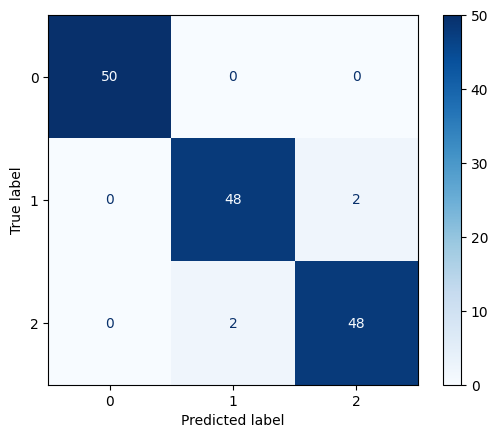

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # import ConfusionMatrixDisplay

# Fit the SVC model
svc_cv.fit(X, y)

# Make predictions
y_pred = svc_cv.predict(X)

# Generate confusion matrix
cm = confusion_matrix(y, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')

# Generate classification report
report = classification_report(y, y_pred)
print("Classification Report:\n", report)